## 1. 필요 Library 설치

In [1]:
!pip install beautifulsoup4

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [108]:
!pip install pillow

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [110]:
!pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 2. 실행 코드

### (1) 라이브러리 불러오기

In [1]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import random
import requests
import re

import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

### (2) 네이버 종목 토론방 긁어오기

In [2]:
def stock_discussion_room(stock_code, pages):
    
    opinion_date_total = []
    opinion_total = []
    chanti = []
    anti = []
    
    r = re.compile(r'\d{4}.\d{2}.\d{2}')
    
    for i in range(pages) :
        
        url = 'https://finance.naver.com/item/board.nhn?code=' + stock_code + '&page=' + str(i+1)
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        opinion = soup.select('.title')
        opinion_date = []
        
        for date in soup.find_all('span') : 
            match = r.search(date.text)
            
            if match != None :
                opinion_date.append(match.group())

        opinion_date = opinion_date[-20:]
        
        for value in opinion_date : 
            opinion_date_total.append(value)
        
        for i in range(20) :    
            opinion_total.append(opinion[i].find('a')['title'])
           
        for i, finger in enumerate(soup.find_all('strong')) :
            
            if i in np.arange(2,42, step = 2) :     
                chanti.append(finger.text)

            elif i in np.arange(3,42, step = 2) :
                anti.append(finger.text)
    
    return opinion_date_total, opinion_total, chanti, anti

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [3]:
opinion_date_total, opinion_total, chanti, anti = stock_discussion_room('300080', 100)

In [4]:
df = pd.DataFrame({'날짜' : opinion_date_total, '토론제목' : opinion_total, '찬성' : chanti, '반대' : anti})

In [5]:
df['날짜'].unique()

array(['2019.12.30', '2019.12.29', '2019.12.27', '2019.12.26',
       '2019.12.24', '2019.12.23', '2019.12.20', '2019.12.19',
       '2019.12.18', '2019.12.17', '2019.12.16', '2019.12.15',
       '2019.12.14', '2019.12.13', '2019.12.12', '2019.12.11',
       '2019.12.10', '2019.12.09', '2019.12.07', '2019.12.06',
       '2019.12.05', '2019.12.04', '2019.12.03', '2019.12.02',
       '2019.12.01', '2019.11.29', '2019.11.28', '2019.11.27',
       '2019.11.26', '2019.11.25', '2019.11.24', '2019.11.23',
       '2019.11.22', '2019.11.21', '2019.11.20', '2019.11.19',
       '2019.11.18', '2019.11.16', '2019.11.17', '2019.11.15',
       '2019.11.14', '2019.11.13', '2019.11.12', '2019.11.11',
       '2019.11.10', '2019.11.09', '2019.11.08', '2019.11.07',
       '2019.11.06', '2019.11.05', '2019.11.04', '2019.11.03',
       '2019.11.02', '2019.11.01', '2019.10.31', '2019.10.30',
       '2019.10.29', '2019.10.28', '2019.10.27', '2019.10.26',
       '2019.10.25', '2019.10.24', '2019.10.23', '2019.

In [7]:
df.head()

,날짜,토론제목,찬성,반대
0,2019.12.30,AI 스타트업 M&A 급증,5,5
1,2019.12.30,플리토,0,0
2,2019.12.29,성수기에 수주소식이 아예 없네요,6,6
3,2019.12.29,배당줄까요?ㅎㅎ,0,2
4,2019.12.27,이거는?ㅡㅡ,1,4


### (3) 인간지표 구하기

In [8]:
df['인간지표'] = np.nan
for i in range(df.shape[0]) :
    if int(df['찬성'][i]) == int(df['반대'][i]) :
        df['인간지표'][i] = '중립'
    elif int(df['찬성'][i]) > int(df['반대'][i]) :
        df['인간지표'][i] = '찬티'
    elif int(df['찬성'][i]) < int(df['반대'][i]) :
        df['인간지표'][i] = '안티'
df

C:\Users\woong\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\woong\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,날짜,토론제목,찬성,반대,인간지표
0,2019.12.30,AI 스타트업 M&A 급증,5,5,중립
1,2019.12.30,플리토,0,0,중립
2,2019.12.29,성수기에 수주소식이 아예 없네요,6,6,중립
3,2019.12.29,배당줄까요?ㅎㅎ,0,2,안티
4,2019.12.27,이거는?ㅡㅡ,1,4,안티
5,2019.12.27,플리토는..,0,3,안티
6,2019.12.27,직원들 사기진작을위한 훈훈한 공시하나 떳네요,4,6,안티
7,2019.12.27,유튜브 플리토 재무팀 통화(12월27일),4,5,안티
8,2019.12.27,얘는 절대 매수 금지ㅜㅜ,4,3,찬티
9,2019.12.27,Ai미래 있긴있겠죠??,0,0,중립


### (4) 워드클라우드 살펴보기

In [9]:
contents = " "
for content in df['토론제목'] : 
    contents = contents + " " + content
contents


'  AI 스타트업 M&A 급증 플리토 성수기에 수주소식이 아예 없네요 배당줄까요?ㅎㅎ 이거는?ㅡㅡ 플리토는.. 직원들 사기진작을위한 훈훈한 공시하나 떳네요 유튜브 플리토 재무팀 통화(12월27일) 얘는 절대 매수 금지ㅜㅜ Ai미래 있긴있겠죠?? 정수 6000주 손절하는놈 삼성, 갤럭시 11에 ‘AI통역, 속기사’ 탑재 매집한다고 이미 말씀드렸됴 왕개미 매집완료 오이오이 플리토 잘되면 욜로에서 친목을~ 부진하면 질책을~ 자영업자입니다 저희 가게도 상장 가능한가요? 해외업체 수주는 모르겠는데... 야덜아ㅋ 문짱깨 시뻘갱이 치세에 주식하기 힘들제?ㅋ 이건 완전 씽크홀이네 쫄지마라 blac이가 건들면  돈 뉴수 스톡옵션 에라  사기꾼 새퀴야 듕국에 야덜아ㅋ문짱깨 시뻘갱이 치세에 단타치면 뭐다? 오늘하락이유 올안에 여기서 장투니 가치투자니 흉내내다 니들 진짜 죽어 플리플리 플리토 ~~~~ 이거 관리하는 새끼들 와 지지선 정찰병 보낸게 ㅋㅋ blac이가  플리토  개사모 다시 왔습니다 근데 또 물리네 적정가 2020 1.1 흠 800 냄새가 풀풀~/ ㅅㅍ 이건 절대 매수 금지랬는데ㅜㅜ 다들 유진 매수중입니다 뇌피셜 조만간 조만간  그제 수익보고 재진입했다 그냥 손절하고 갑니다 올려놓고 파네 바닥을 2주 기다가 오겠구만  시간낭비 와 기관 잡주 구지 묶여있을필요없음 당장올릴마음 없는건 확인   2020 여서 함 붙어보까!! 쓰레기네 으..전량손절 창업 아침에 이미 힌트 드렸습니다. 쓰레기네 으.. 거꾸로 거래실종 영업이익률 1위 가즈아~ + 어제 올린글 인위적 매수세 유도 blac아 어디있니? 개잡주 어제 인위적으로 사는척 팔더니 번역기 진단 Ai 빅데이터 특허보유한 blac아 니 기사 떴다 사모펀드 위아래 17000 와 야금야금매수하면 되냐? 이세돌 승리로 국내ai투자 절실 분위기 고조될 듯 호재는 뜨고 주가는 바닥인거 같고 17550 바닥이없는 종목이네; 쫄지마 오늘 매수가 많은데 시초에사서 다. 털었소 물린사람들은 감사합니다. 와 고가애 털었내요 여럿 뭐하는놈이지 

In [10]:
stock_img = Image.open('C:/Users/woong/Desktop/Youtube Contents/[Episode2] 네이버 종목토론방 찬티 vs 안티 인간지표별 주가 변동/플리토.png')
mask = Image.new("RGB", stock_img.size, (255,255,255))
mask.paste(stock_img)
mask = np.array(mask)

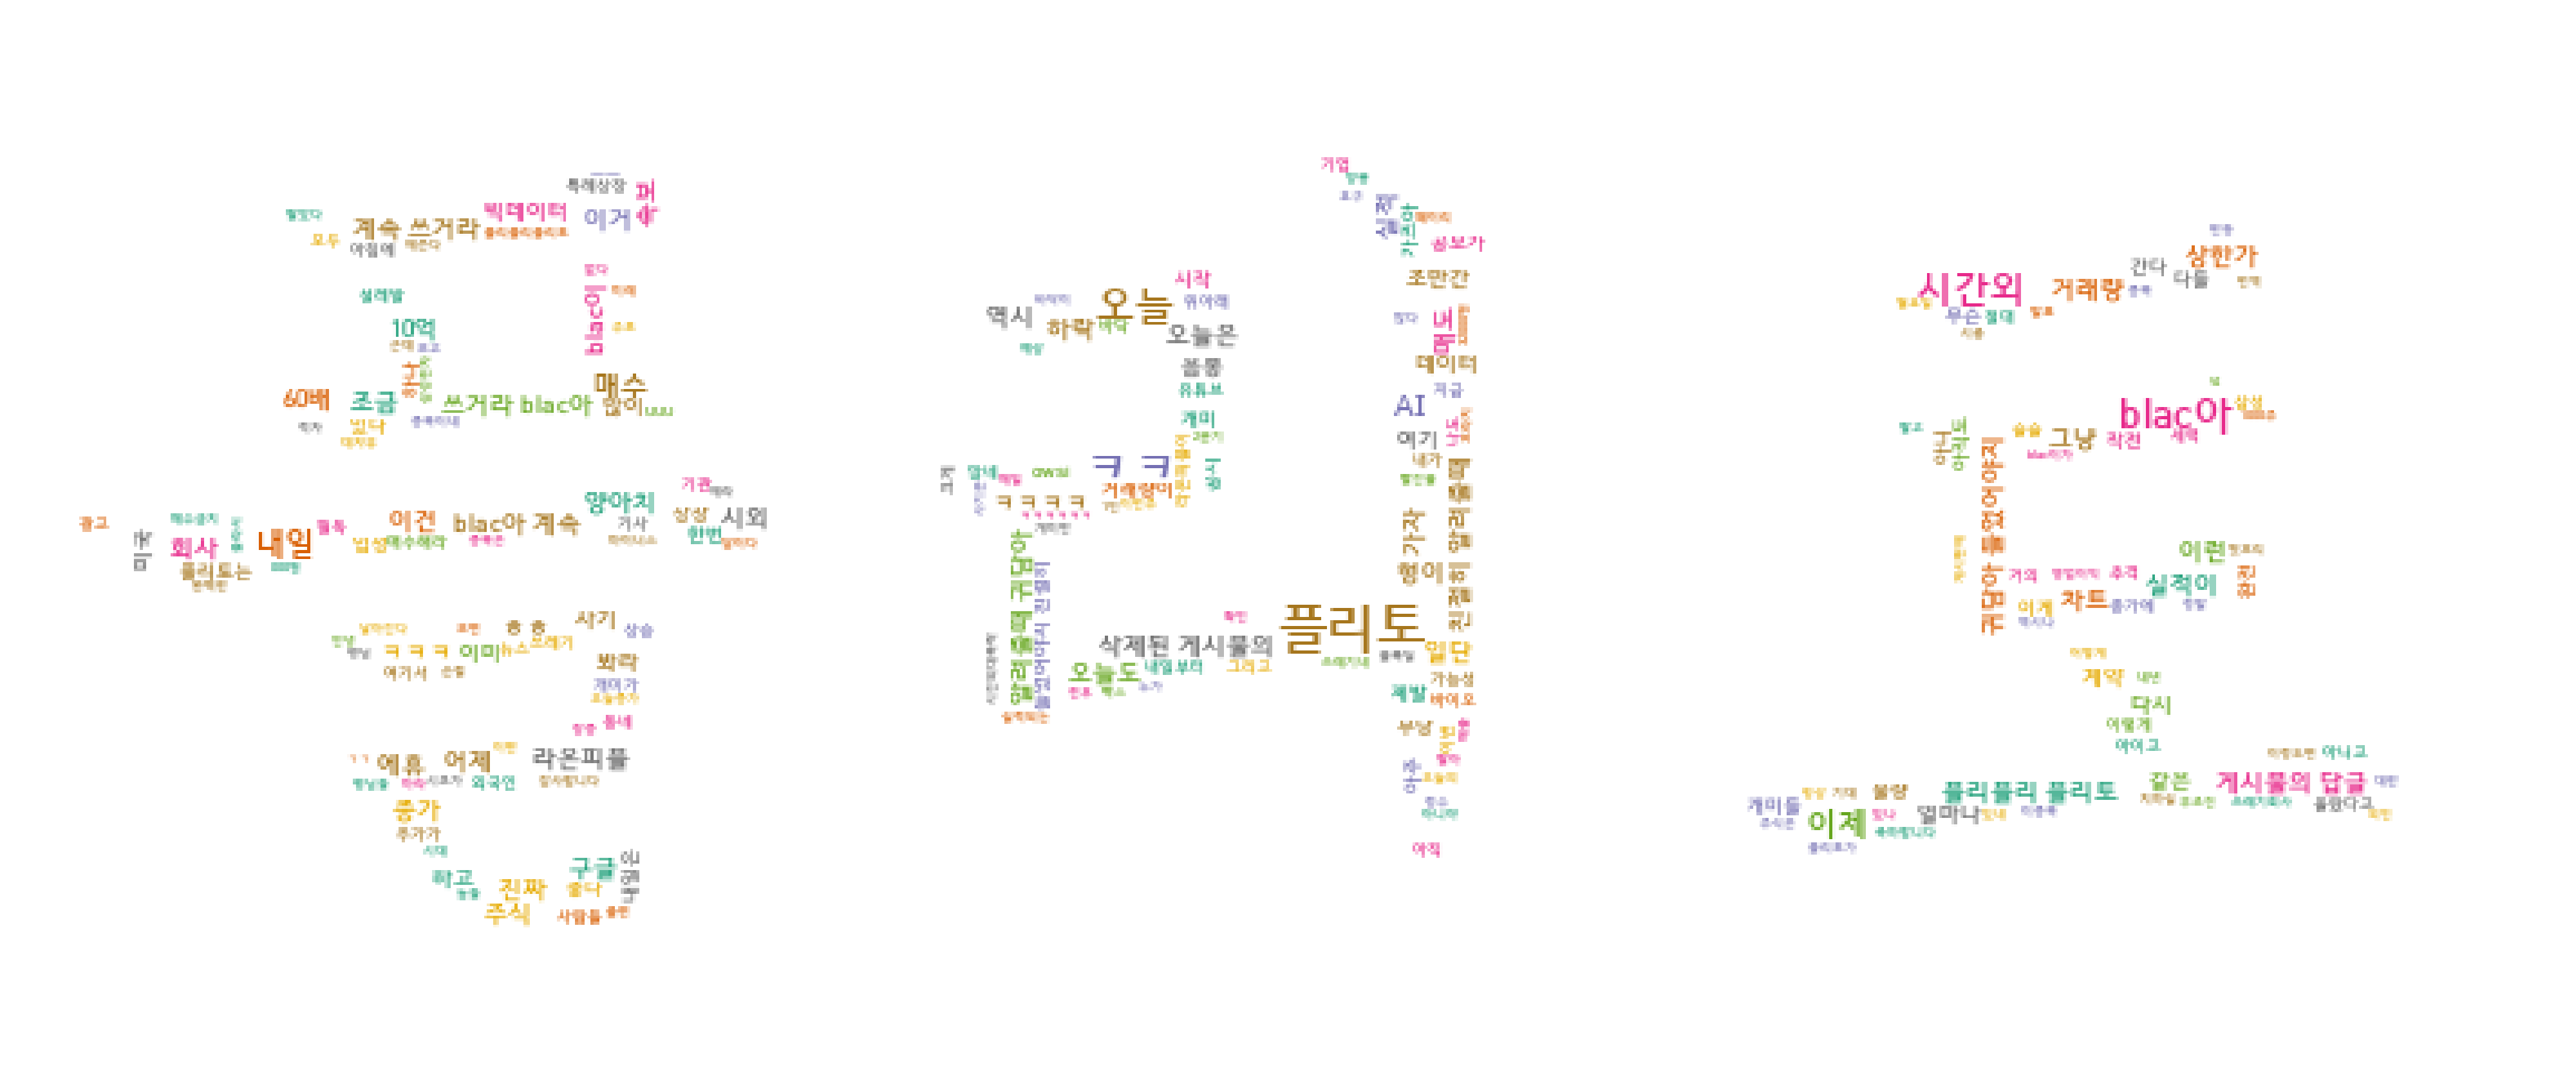

In [11]:
plt.figure(figsize = (80,30))
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HANDotumB.ttf', background_color="white", colormap = "Dark2_r",
               max_words=2000, mask=mask, max_font_size=300, random_state=42)
               
wc.generate_from_text(contents)

plt.imshow(wc)
plt.axis("off")
plt.savefig('WC_플리토.png')

### (5) 인간지표 별 주가 그래프 그리기

In [12]:
df_test = df[['날짜', '인간지표']]
df_dummies = pd.get_dummies(df_test['인간지표'])
df_hodu = pd.concat([df_test['날짜'], df_dummies], axis = 1)
df_hodu = df_hodu.groupby('날짜').sum()

In [13]:
df_hodu.head()

,안티,중립,찬티
날짜,,,
2019.10.04,16,18,28
2019.10.05,1,2,4
2019.10.06,2,1,6
2019.10.07,38,23,48
2019.10.08,18,16,27


In [14]:
def daily_stock_close(stock_code):
    
    daily_close = []
    date = []
    
    url = 'https://finance.naver.com/item/frgn.nhn?code=' + stock_code
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    for i in range(3,len(soup.select('table.type2')[1].select('tr'))) :
        
        try :
            daily_close.append(soup.select('table.type2')[1].select('tr')[i].select('td')[1].text.replace(',' , ''))
            date.append(soup.select('table.type2')[1].select('tr')[i].select('td')[0].text)
            
        except IndexError :
            continue
        
    return date, daily_close

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [15]:
date, daily_close = daily_stock_close("300080")

In [16]:
df_close = pd.DataFrame({"날짜" : date, "종가" : daily_close})

In [17]:
df_close.head()

,날짜,종가
0,2019.12.30,17900
1,2019.12.27,17000
2,2019.12.26,16550
3,2019.12.24,16400
4,2019.12.23,16350


In [66]:
df = pd.merge(df_close, df_hodu, how = 'right', on = '날짜')

In [67]:
df.sort_values(['날짜'], ascending=True, inplace=True)

In [68]:
df.dropna(axis=0, inplace=True)
df.head()

,날짜,종가,안티,중립,찬티
19,2019.12.02,17350,5,37,12
18,2019.12.03,17200,1,9,7
17,2019.12.04,16400,2,10,11
16,2019.12.05,17200,8,19,4
15,2019.12.06,17150,4,3,3


In [75]:
df['종가'] = df['종가'].astype(int)

In [21]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] 

사용가능한 TTF 폰트 개수: 745


['C:\\WINDOWS\\Fonts\\cour.ttf',
 'C:\\WINDOWS\\Fonts\\NGULIM.TTF',
 'C:\\Windows\\Fonts\\ERASBD.TTF',
 'C:\\Windows\\Fonts\\tahomabd.ttf',
 'C:\\Windows\\Fonts\\H2PORL.TTF',
 'C:\\Windows\\Fonts\\trebucbi.ttf',
 'C:\\WINDOWS\\Fonts\\arial.ttf',
 'C:\\WINDOWS\\Fonts\\courbi.ttf',
 'C:\\Windows\\Fonts\\mmrtext.ttf',
 'C:\\Windows\\Fonts\\calibrili.ttf']

In [22]:
font_fname = 'C:\\Windows\\Fonts\\HANDotumB.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

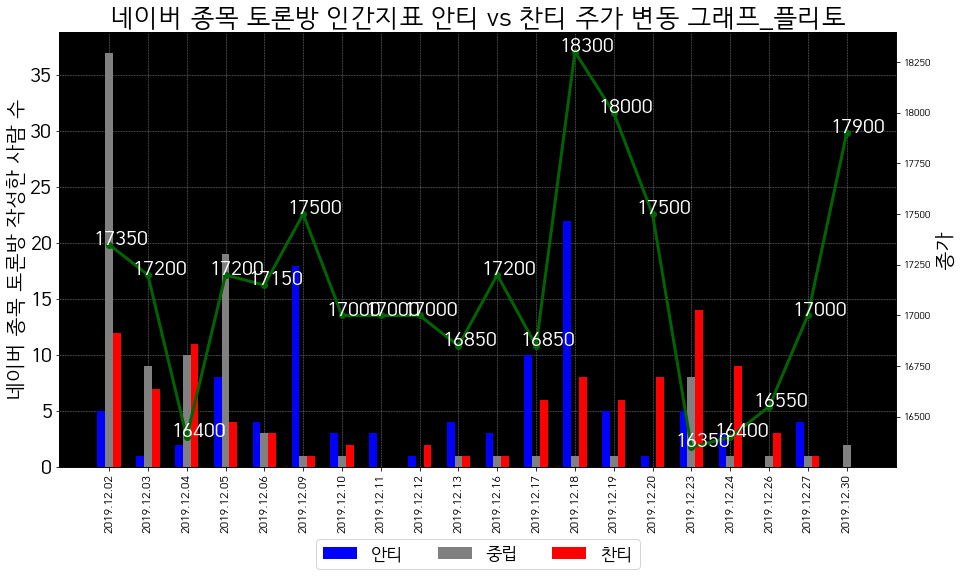

In [77]:
x = np.arange(len(df['날짜']))

fig, ax = plt.subplots(figsize=(15,8))
plt.bar(x+-0.2, df['안티'],width=0.2, label = '안티', color = 'blue')
plt.bar(x, df['중립'],width=0.2,  label = '중립', color = 'gray')
plt.bar(x+0.2, df['찬티'],width=0.2, label = '찬티', color = 'red')
plt.xticks(x, df['날짜'], fontsize='12', rotation = 90)
plt.title('네이버 종목 토론방 인간지표 안티 vs 찬티 주가 변동 그래프_플리토', fontsize='25')
plt.yticks(fontsize=20)
ax.set_ylabel('네이버 종목 토론방 작성한 사람 수', fontsize = '20')
ax.patch.set_facecolor('black')
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.legend(bbox_to_anchor=(0.5, -0.2), loc = 'center', ncol = 3, fontsize=17)


ax2 = ax.twinx()
ax2.autoscale()
ax2.set_ylabel('종가', fontsize = 20)
ax2.plot(df['종가'].values, linestyle='-', marker='o', linewidth=3.0, color = 'darkgreen')

for i, x in enumerate(x):
    plt.text(x-0.4, df['종가'].values[i], df['종가'].values[i], fontsize=20, color ='white')

plt.savefig('인간지표 주가 변동 그래프_플리토.png')
plt.show()